In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

# Pandas

 - Fundamental data structures: `Series`, `DataFrame` and `Index`
 
 ### Series
 
 Series is the fancy version of python built-in dictionaries. Series is an analog of a one-dimensional array with flexible indices.
 
 ### DataFrame
 
 DataFrame is an analog of a two-dimensional array with both flexible row indices and flexible column names.
 
 ### Index
 
 Used in Series and DataFrame. It is like immutable array. It also operates like set such that union, intersection and difference operations are allowed.

In [17]:
# Similar to dictionary

data = pd.Series(np.arange(6) + 5)
print(data)
print(data.values)

# Can be constructed from dictionary directly

print()
d = {"foo":10, "bar":12, "baz":11}
data = pd.Series(d)
print(data)

# Unlike dictionary, it is sorted
print()
print(data["bar":"baz"]) # Strangly it also includes data["baz]

# Index parameter can be given explicitly
print()
data = pd.Series([10, 100, 1, 1000], index = [1, 2, 0, 3])
print(data)

0     5
1     6
2     7
3     8
4     9
5    10
dtype: int64
[ 5  6  7  8  9 10]

bar    12
baz    11
foo    10
dtype: int64

bar    12
baz    11
dtype: int64

1      10
2     100
0       1
3    1000
dtype: int64


In [25]:
# DataFrame is like a table

# Can be created from dict
data = pd.DataFrame([{"a": 1, "b": 2}, {"a":0, "b": 2}, {"a":10, "b": -5}])
print(data)

# even if some values are missing
print()
data = pd.DataFrame([{"a": 1, "b": 2}, {"a":0, "b": 2}, {"a":10}])
print(data)

print(data.columns)

# from series
print()
s = pd.Series({"foo":10, "bar":12, "baz":11})
data = pd.DataFrame(s, columns=["col id"])
print(data)

# or dict of series
print()
data = pd.DataFrame({"col id":s})
print(data)

    a  b
0   1  2
1   0  2
2  10 -5

    a    b
0   1  2.0
1   0  2.0
2  10  NaN
Index(['a', 'b'], dtype='object')

     col id
bar      12
baz      11
foo      10

     col id
bar      12
baz      11
foo      10


## Indexing and Selection

When we do numpy like indexing, a confusion may arise whether we meant explicit or implicit indices. Since "Explicit is better than implicit", we use related methods `loc`, `iloc`. The same logic applies to both Series and DataFrames.

 - `ix` is like hybrid of `loc` and `iloc`. Again it might be dangerous if indices are integer.

In [28]:
data = pd.Series(["a", "b", "c"], index = [1, 3, 5])
print(data)

print(data.loc[1:3]) # Note that 3 is included in explicit slicing
print(data.iloc[1:3])

1    a
3    b
5    c
dtype: object
1    a
3    b
dtype: object
3    b
5    c
dtype: object


## Time Series Examples



Pandas Frequency Code Table :

| Code        | Description           |
| ------------- |-------------|
| D | Calendar day |
| W | Weekly |
| M | Month end |
| Q | Quarter end |
| A | Year end |
| H | Hours |
| T | Minutes |
| S | Seconds |
| L | Milliseconds |
| U | Microseconds |
| N | Nanoseconds |
| B | Business day |
| BM | Business month end |
| BQ | Business quarter end |
| BA | Business year end |
| BH | Business hours |

In [33]:
date = np.array("2018-01-01", dtype=np.datetime64)
date2 = np.arange(12) + date
print(date2) # Adds days
print(date2.dtype)

date = np.array("2018-01-01 12:00", dtype=np.datetime64)
date2 = np.arange(12) + date
print(date2) # Adds minutes
print(date2.dtype)

date = pd.to_datetime("2018-01-01 12:00")
date2 = date + pd.to_timedelta(np.arange(12), "H")
print(date2)

frequency_codes = pd.Series({"D": "Calendar day", "W": "Weekly"})
print(frequency_codes)

['2018-01-01' '2018-01-02' '2018-01-03' '2018-01-04' '2018-01-05'
 '2018-01-06' '2018-01-07' '2018-01-08' '2018-01-09' '2018-01-10'
 '2018-01-11' '2018-01-12']
datetime64[D]
['2018-01-01T12:00' '2018-01-01T12:01' '2018-01-01T12:02'
 '2018-01-01T12:03' '2018-01-01T12:04' '2018-01-01T12:05'
 '2018-01-01T12:06' '2018-01-01T12:07' '2018-01-01T12:08'
 '2018-01-01T12:09' '2018-01-01T12:10' '2018-01-01T12:11']
datetime64[m]
DatetimeIndex(['2018-01-01 12:00:00', '2018-01-01 13:00:00',
               '2018-01-01 14:00:00', '2018-01-01 15:00:00',
               '2018-01-01 16:00:00', '2018-01-01 17:00:00',
               '2018-01-01 18:00:00', '2018-01-01 19:00:00',
               '2018-01-01 20:00:00', '2018-01-01 21:00:00',
               '2018-01-01 22:00:00', '2018-01-01 23:00:00'],
              dtype='datetime64[ns]', freq=None)
D    Calendar day
W          Weekly
dtype: object


In [110]:
f = web.DataReader('GOOG', 'morningstar', start='2004', end='2016')
print(f.head())

data = f.loc["GOOG", :]

print( data.index.min())
print( data.index.max())
data.index.name = "Time"

close = data["Close"]

                      Close      High       Low      Open  Volume
Symbol Date                                                      
GOOG   2014-03-27  556.9312  566.4451  551.4064  566.4451   13087
       2014-03-28  558.4570  564.8794  557.1406  559.7136   41115
       2014-03-31  555.4453  565.4478  555.4054  565.3381   10801
       2014-04-01  565.6074  566.8939  557.1805  557.1805    7953
       2014-04-02  565.4478  603.1743  560.6510  579.1702  147099
2014-03-27 00:00:00
2016-01-01 00:00:00


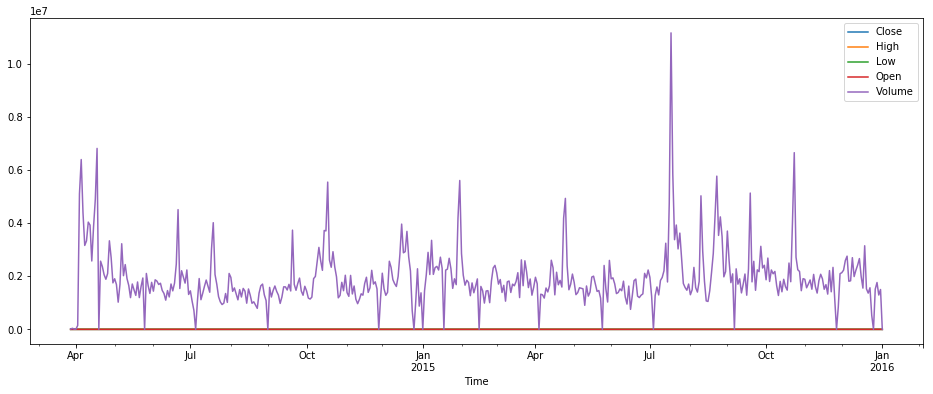

In [111]:
# DataFrame objects have a nice plot method
data.plot(figsize=(16,6))
plt.show()

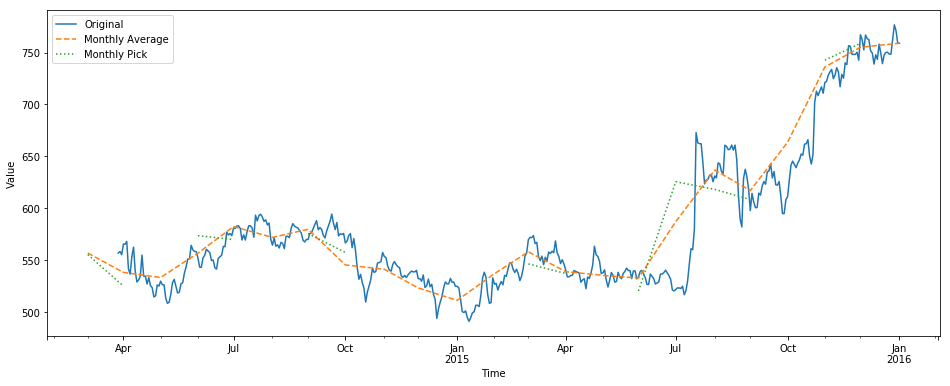

In [112]:
# Resampling

close_month = close.resample("M").mean()
close.plot(figsize=(16,6))
close_month.plot(style="--")
close.asfreq("M").plot(style=":")
plt.legend(["Original","Monthly Average", "Monthly Pick"])
plt.ylabel("Value")
plt.show()

(462,)
(462,)


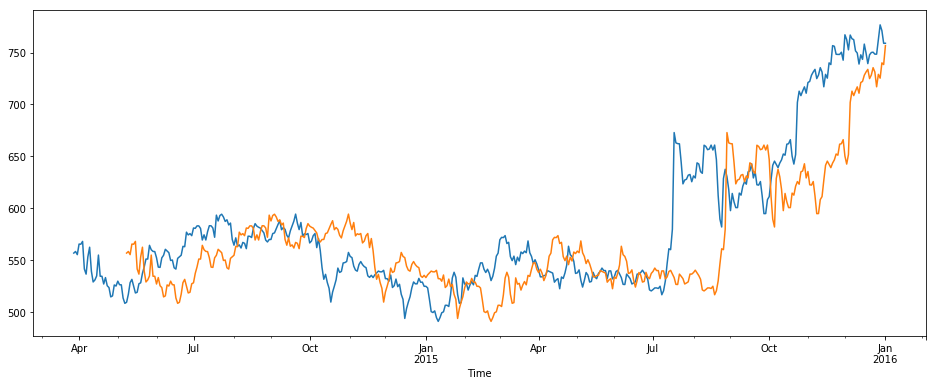

In [102]:
# Shifting

close_30_ahead = close.shift(30)

print(close.shape)
print(close_30_ahead.shape)

close.plot(figsize=(16,6))
close_30_ahead.plot()
plt.show()

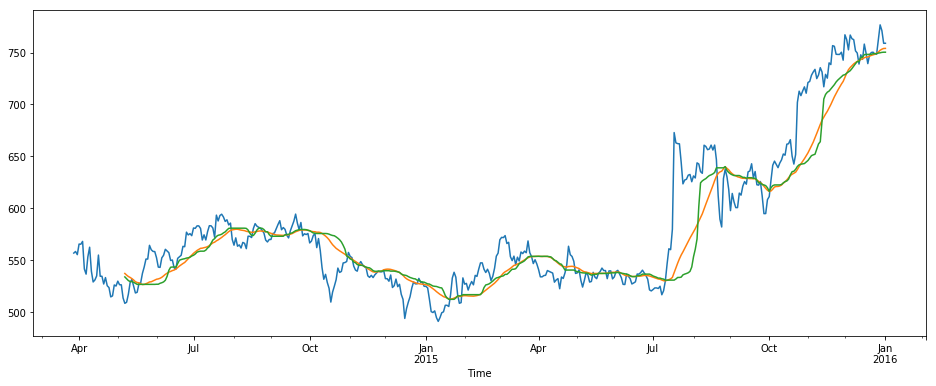

In [118]:
# Rolling Operations

# It let us do certain operation on a window of fixed size.

# Rolling average = Moving average

close_rolling = close.rolling(30) # Window size
close.plot(figsize=(16,6))
close_rolling.mean().plot()
close_rolling.median().plot()

plt.show()

# We can also apply own funcion on these windowed data
close_rolling.apply?

## On Performance

`mask = (x > 0.5) & (y < 0.5)`

Every immediate step is explicitly allocated in memory, this issue may lead to memory problems. The Numexpr library gives us ability to compute such expressions element by element. Pandas provides `eval()` and `query()` methods, using Numexpr package but the difference is barely noticable.

In [127]:
pd.eval?

In [128]:
pd.DataFrame.query?

In [121]:
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols)) for i in range(4))

%timeit df1 + df2 + df3 + df4

%timeit pd.eval("df1 + df2 + df3 + df4")

# Difference is not very much though

116 ms ± 1.86 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
121 ms ± 7.38 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Object `pd.query` not found.
